In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install xarray matplotlib cartopy netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.2 MB/s eta 0:00:00


In [34]:
import xarray as xr

# Carregar o arquivo NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/ESTUDOS 📖📓/Met Sinótica/Sinótica 2/vento_era5.nc')

# Visualizar as chaves presentes no conjunto de dados
print(ds.keys())


KeysView(<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 70)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-12-30T12:00:00
Data variables:
    u100       (time, latitude, longitude) float32 ...
    v100       (time, latitude, longitude) float32 ...
    u10n       (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10n       (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    fg10       (time, latitude, longitude) float32 ...
    i10fg      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-14 23:16:24 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...)


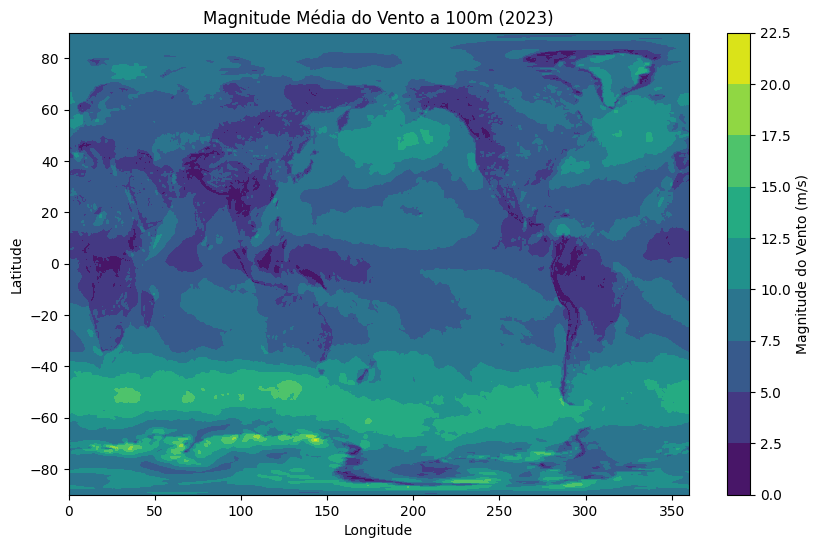

In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/ESTUDOS 📖📓/Met Sinótica/Sinótica 2/vento_era5.nc')

# Calcular a magnitude do vento a partir das componentes u e v do vento a 100m
wind_speed = np.sqrt(ds['u100']**2 + ds['v100']**2)

# Plotar o sombreado do gráfico representando a magnitude do vento
plt.figure(figsize=(10, 6))
cs = plt.contourf(ds['longitude'], ds['latitude'], wind_speed.mean(dim='time'), cmap='viridis')
plt.colorbar(cs, label='Magnitude do Vento (m/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Magnitude Média do Vento a 100m (2023)')
plt.show()


In [42]:
print(ds['latitude'])


<xarray.DataArray 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude


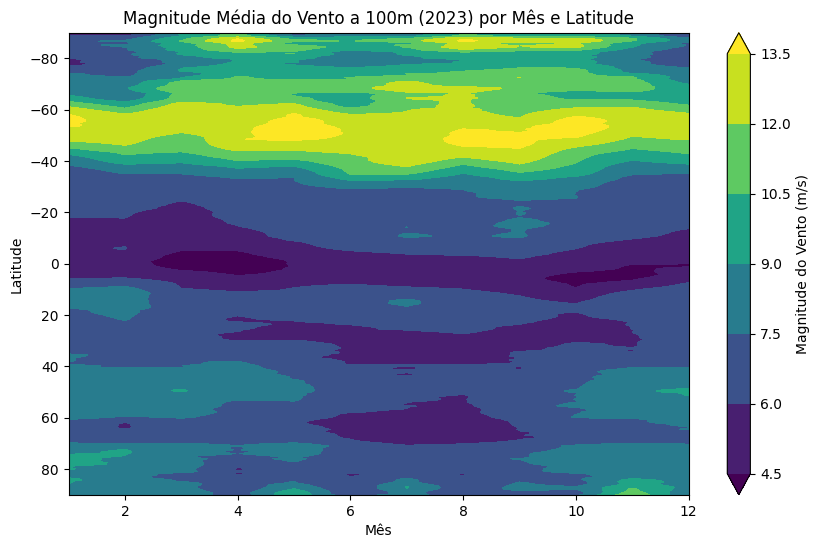

In [44]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/ESTUDOS 📖📓/Met Sinótica/Sinótica 2/vento_era5.nc')

# Calcular a magnitude do vento a partir das componentes u e v do vento a 100m
wind_speed = np.sqrt(ds['u100']**2 + ds['v100']**2)

# Calcular a média mensal da magnitude do vento
monthly_mean_wind_speed = wind_speed.groupby('time.month').mean(dim=['time', 'longitude'])

# Selecionar as latitudes
latitudes = ds['latitude']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
cs = plt.contourf(np.arange(1, 13), latitudes, monthly_mean_wind_speed.T, cmap='viridis', extend='both')
plt.colorbar(cs, label='Magnitude do Vento (m/s)')
plt.xlabel('Mês')
plt.ylabel('Latitude')
plt.title('Magnitude Média do Vento a 100m (2023) por Mês e Latitude')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a latitude -90 esteja na parte inferior do gráfico
plt.show()


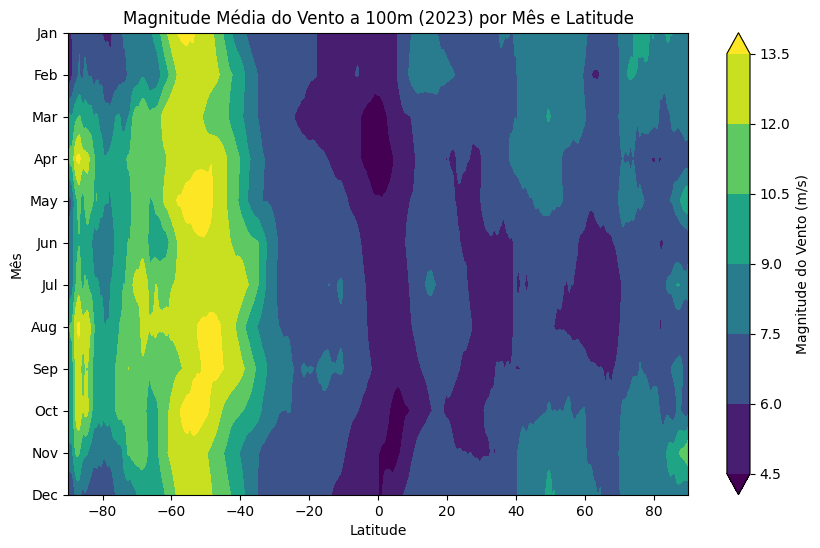

In [52]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Carregar o arquivo NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/ESTUDOS 📖📓/Met Sinótica/Sinótica 2/vento_era5.nc')

# Calcular a magnitude do vento a partir das componentes u e v do vento a 100m
wind_speed = np.sqrt(ds['u100']**2 + ds['v100']**2)

# Calcular a média mensal da magnitude do vento
monthly_mean_wind_speed = wind_speed.groupby('time.month').mean(dim=['time', 'longitude'])

# Definir os nomes dos meses
meses_abreviados = [calendar.month_abbr[i] for i in range(1, 13)]

# Plotar o gráfico
plt.figure(figsize=(10, 6))
cs = plt.contourf(ds['latitude'], np.arange(1, 13), monthly_mean_wind_speed, cmap='viridis', extend='both')
plt.colorbar(cs, label='Magnitude do Vento (m/s)')
plt.xlabel('Latitude')
plt.ylabel('Mês')
plt.yticks(np.arange(1, 13), meses_abreviados)  # Usar os nomes abreviados dos meses
plt.title('Magnitude Média do Vento a 100m (2023) por Mês e Latitude')
plt.gca().invert_yaxis()  # Inverter o eixo y para que janeiro fique na parte superior do gráfico
plt.show()


In [53]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/ESTUDOS 📖📓/Met Sinótica/Sinótica 2/vento_era5.nc')

# Selecionar uma única altura para visualização
altitude_index = 0  # Índice da altura a ser selecionada
altitude = ds['altitude'][altitude_index]

# Calcular a magnitude do vento a partir das componentes u e v do vento a 100m
wind_speed = np.sqrt(ds['u100']**2 + ds['v100']**2)

# Calcular a média da magnitude do vento ao longo do tempo
mean_wind_speed = wind_speed.mean(dim='time')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
cs = plt.contourf(ds['latitude'], altitude, mean_wind_speed, cmap='viridis', extend='both')
plt.colorbar(cs, label='Magnitude do Vento (m/s)')
plt.xlabel('Latitude')
plt.ylabel('Altitude (m)')
plt.title('Magnitude Média do Vento a 100m (2023) por Latitude e Altitude')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a altitude aumente de baixo para cima
plt.show()


KeyError: 'altitude'